In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle

Load and display the cleaned dataframe from the data cleaning notebook.

In [2]:
df = pd.read_pickle('cleaned_df.pkl')
df['date'] = pd.to_datetime(df['date'])
display(df)

,date,UnitedStates,NewYorkNY,LosAngelesCA,ChicagoIL,DallasTX,HoustonTX,WashingtonDC,MiamiFL,PhiladelphiaPA,...,ArkadelphiaAR,CordeleGA,SterlingCO,ElkCityOK,BeatriceNE,StormLakeIA,VineyardHavenMA,FitzgeraldGA,KetchikanAK,CraigCO
0,2000-01-31,128276.0,226266.0,240598.0,170254.0,129923.0,127011.0,200209.0,140286.0,131271.0,...,67268.0,68076.0,99366.0,68183.0,NaN,74884.0,372204.0,53934.0,NaN,102246.0
1,2000-02-29,128617.0,227618.0,241457.0,170658.0,130024.0,127075.0,200484.0,140825.0,131708.0,...,66978.0,68422.0,99441.0,67899.0,NaN,75182.0,374415.0,53665.0,NaN,102636.0
2,2000-03-31,128973.0,228829.0,242727.0,171176.0,130113.0,126950.0,200883.0,141306.0,131976.0,...,67527.0,68606.0,99606.0,67851.0,NaN,75351.0,376023.0,53607.0,NaN,103269.0
3,2000-04-30,129698.0,231213.0,245142.0,172211.0,130326.0,127064.0,201744.0,142247.0,132634.0,...,68099.0,69095.0,100106.0,67723.0,NaN,75787.0,380730.0,53347.0,NaN,104029.0
4,2000-05-31,130427.0,233418.0,247707.0,173301.0,130543.0,127071.0,202922.0,143018.0,133157.0,...,69001.0,69529.0,100883.0,67784.0,NaN,76103.0,385739.0,53277.0,NaN,104795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-08-31,356556.0,622586.0,973842.0,316308.0,393831.0,315809.0,578664.0,544775.0,341932.0,...,123634.0,140698.0,269286.0,143394.0,152090.0,159386.0,1246479.0,111984.0,420959.0,289057.0
272,2022-09-30,356904.0,623535.0,963691.0,316606.0,392135.0,316186.0,578775.0,548952.0,343083.0,...,124514.0,141292.0,271087.0,143538.0,152948.0,160176.0,1257381.0,112222.0,423553.0,291349.0
273,2022-10-31,357416.0,623959.0,953568.0,317244.0,392285.0,316795.0,580092.0,550270.0,344654.0,...,125634.0,142009.0,273086.0,143946.0,153868.0,161085.0,1271642.0,112881.0,426073.0,293115.0
274,2022-11-30,357905.0,624928.0,948645.0,317759.0,392143.0,317443.0,582009.0,553268.0,346914.0,...,126876.0,142572.0,268555.0,143440.0,153429.0,161840.0,1256962.0,113036.0,426722.0,287654.0


Load and display the data from FRED's data on Consuemr Price Index. Note the one-off shift, i.e. ZHVI records at the end of the month while CPI records on the first. 

In [3]:
df_cpi = pd.read_csv('CPIAUCSL.csv')
df_cpi['DATE'] = pd.to_datetime(df_cpi['DATE'])
df_cpi = df_cpi.loc[df_cpi['DATE'] >= '2000-01-01']
df_cpi.reset_index(inplace=True)
display(df_cpi)

,index,DATE,CPIAUCSL
0,636,2000-01-01,169.300
1,637,2000-02-01,170.000
2,638,2000-03-01,171.000
3,639,2000-04-01,170.900
4,640,2000-05-01,171.200
...,...,...,...
271,907,2022-08-01,295.620
272,908,2022-09-01,296.761
273,909,2022-10-01,298.062
274,910,2022-11-01,298.349


We will add the CPI data to the main dataframe, associating each CPI (on the first of each month) with the previous day's ZHVI (on the last of each month). To make these line up, we will delete the last row of the ZHVI dataframe since we don't have a corresponding CPI observation and, for similar reasons, delete the first CPI observation. Note that this introduces an inaccuracy in the association between the data column and the CPI column that should be kept in mind.

In [4]:
df = df.iloc[:-1,:]
df_cpi = df_cpi.iloc[1:,:]
df_cpi.reset_index(inplace=True)

df['CPI'] = df_cpi['CPIAUCSL']
display(df)

,date,UnitedStates,NewYorkNY,LosAngelesCA,ChicagoIL,DallasTX,HoustonTX,WashingtonDC,MiamiFL,PhiladelphiaPA,...,CordeleGA,SterlingCO,ElkCityOK,BeatriceNE,StormLakeIA,VineyardHavenMA,FitzgeraldGA,KetchikanAK,CraigCO,CPI
0,2000-01-31,128276.0,226266.0,240598.0,170254.0,129923.0,127011.0,200209.0,140286.0,131271.0,...,68076.0,99366.0,68183.0,NaN,74884.0,372204.0,53934.0,NaN,102246.0,170.000
1,2000-02-29,128617.0,227618.0,241457.0,170658.0,130024.0,127075.0,200484.0,140825.0,131708.0,...,68422.0,99441.0,67899.0,NaN,75182.0,374415.0,53665.0,NaN,102636.0,171.000
2,2000-03-31,128973.0,228829.0,242727.0,171176.0,130113.0,126950.0,200883.0,141306.0,131976.0,...,68606.0,99606.0,67851.0,NaN,75351.0,376023.0,53607.0,NaN,103269.0,170.900
3,2000-04-30,129698.0,231213.0,245142.0,172211.0,130326.0,127064.0,201744.0,142247.0,132634.0,...,69095.0,100106.0,67723.0,NaN,75787.0,380730.0,53347.0,NaN,104029.0,171.200
4,2000-05-31,130427.0,233418.0,247707.0,173301.0,130543.0,127071.0,202922.0,143018.0,133157.0,...,69529.0,100883.0,67784.0,NaN,76103.0,385739.0,53277.0,NaN,104795.0,172.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-07-31,355519.0,620305.0,988839.0,315978.0,394824.0,314567.0,579737.0,537545.0,340872.0,...,139181.0,265071.0,141862.0,150802.0,158389.0,1234203.0,110869.0,417367.0,283921.0,295.620
271,2022-08-31,356556.0,622586.0,973842.0,316308.0,393831.0,315809.0,578664.0,544775.0,341932.0,...,140698.0,269286.0,143394.0,152090.0,159386.0,1246479.0,111984.0,420959.0,289057.0,296.761
272,2022-09-30,356904.0,623535.0,963691.0,316606.0,392135.0,316186.0,578775.0,548952.0,343083.0,...,141292.0,271087.0,143538.0,152948.0,160176.0,1257381.0,112222.0,423553.0,291349.0,298.062
273,2022-10-31,357416.0,623959.0,953568.0,317244.0,392285.0,316795.0,580092.0,550270.0,344654.0,...,142009.0,273086.0,143946.0,153868.0,161085.0,1271642.0,112881.0,426073.0,293115.0,298.349


Load and display the 30-year mortgage data. Note that it is recorded on a weekly, not monthly, basis.

In [5]:
df_mtgrates = pd.read_csv('MORTGAGE30US.csv')
df_mtgrates['DATE'] = pd.to_datetime(df_mtgrates['DATE'])
df_mtgrates = df_mtgrates.loc[(df_mtgrates['DATE'] >= '2000-01-01') & (df_mtgrates['DATE'] <= '2022-11-30')]
df_mtgrates.reset_index(inplace=True, drop=True)
display(df_mtgrates)

,DATE,MORTGAGE30US
0,2000-01-07,8.15
1,2000-01-14,8.18
2,2000-01-21,8.26
3,2000-01-28,8.25
4,2000-02-04,8.25
...,...,...
1190,2022-10-27,7.08
1191,2022-11-03,6.95
1192,2022-11-10,7.08
1193,2022-11-17,6.61


We will take the last mortgage observation available for each month and add it to the dataframe. Note that this introduces some more dramatic inaccuracy in the correspondence between the data column and the date on which the mortage data was actually observed.

In [6]:
mtg_yearmonth = df_mtgrates['DATE'].apply(lambda x: x.strftime('%Y-%m'))
mtg_yearmonth = mtg_yearmonth.drop_duplicates(keep='last')
df_mtgrates = df_mtgrates.iloc[mtg_yearmonth.index]
df_mtgrates.reset_index(inplace=True, drop=True)
display(df_mtgrates)
df['MORTGAGE30US'] = df_mtgrates['MORTGAGE30US']

,DATE,MORTGAGE30US
0,2000-01-28,8.25
1,2000-02-25,8.31
2,2000-03-31,8.23
3,2000-04-28,8.13
4,2000-05-26,8.62
...,...,...
270,2022-07-28,5.30
271,2022-08-25,5.55
272,2022-09-29,6.70
273,2022-10-27,7.08


Visualize ZHVI values for the US as a whole and some major cities.

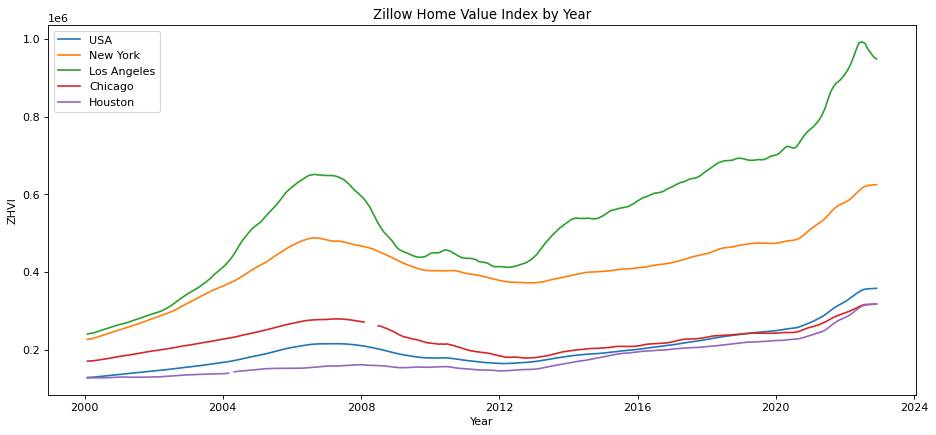

In [7]:
plt.figure(figsize=(14, 6), dpi=80)

us, = plt.plot('date', 'UnitedStates', data=df)
ny, = plt.plot('date', 'NewYorkNY', data=df)
la, = plt.plot('date', 'LosAngelesCA', data=df)
ch, = plt.plot('date', 'ChicagoIL', data=df)
ho, = plt.plot('date', 'HoustonTX', data=df)

us.set_label('USA')
ny.set_label('New York')
la.set_label('Los Angeles')
ch.set_label('Chicago')
ho.set_label('Houston')

plt.xlabel('Year')
plt.ylabel('ZHVI')
plt.title('Zillow Home Value Index by Year')
plt.legend()
plt.show()

For each level of differencing, i.e. 0, 1, and 2, we will visualize the ZHVI data with that level of differencing, give a standard ACF plot, and use the Augmented Dickey-Fuller test to measure stationarity.

Text(0.5, 1.0, 'ZHVI of United States')

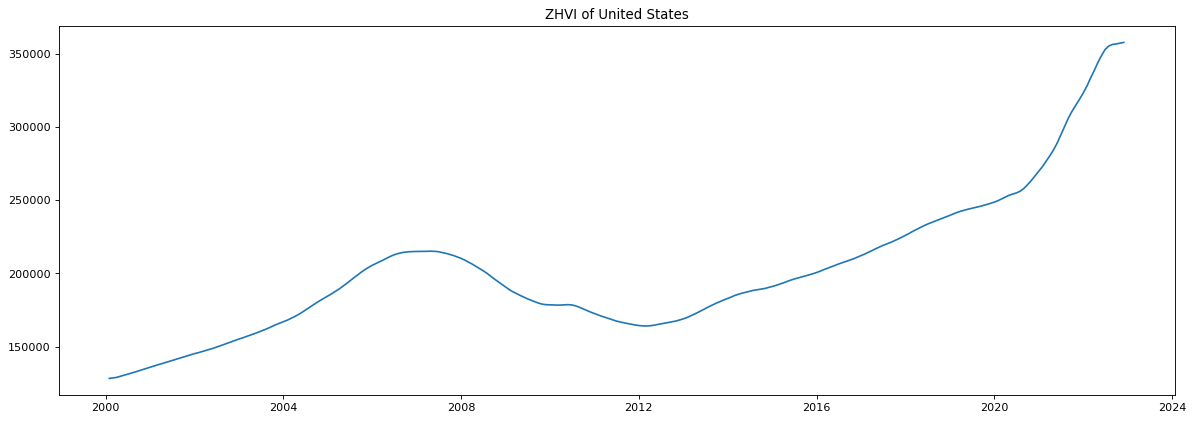

In [8]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot('date', 'UnitedStates', data=df)
plt.title('ZHVI of United States')

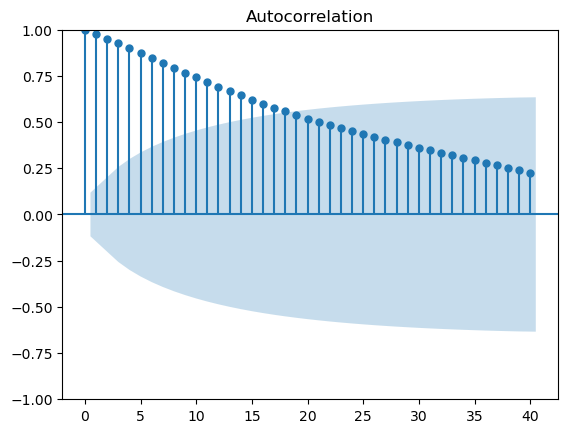

In [9]:
sm.graphics.tsa.plot_acf(df['UnitedStates'], lags=40)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(df['UnitedStates'])


Results of Dickey-Fuller Test:
Test Statistic                  -0.710103
p-value                          0.844115
#Lags Used                      12.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


With a p-value of .84, we do not reject the null hypothesis and conclude that the time series is not stationary. 

Text(0.5, 1.0, 'US ZHVI with differencing 1')

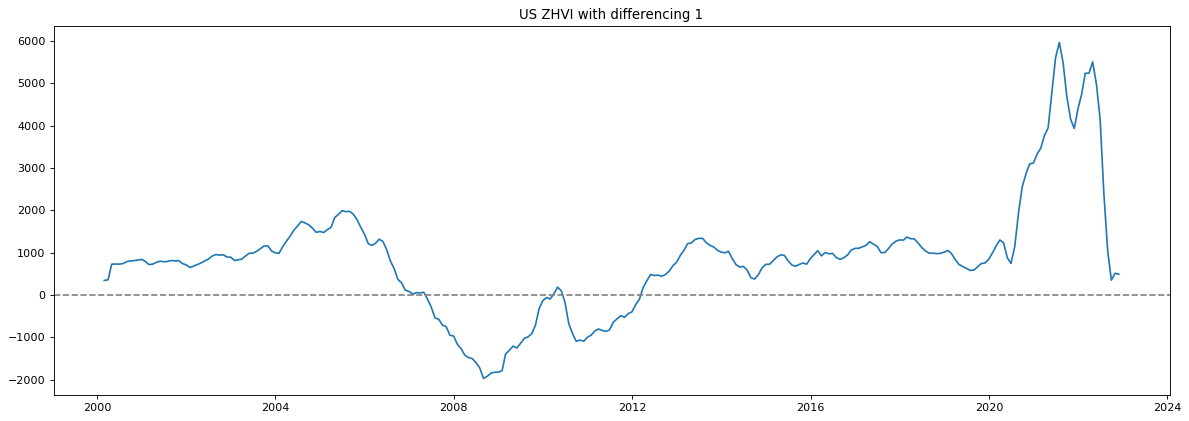

In [11]:
plt.figure(figsize=(18, 6), dpi=80)
df_us_diff = pd.DataFrame({'date': df['date'],
                           'usdiff': df['UnitedStates'].diff(1)})
plt.plot('date', 'usdiff', data=df_us_diff)
plt.axhline(color='gray', linestyle='dashed')
plt.title('US ZHVI with differencing 1')

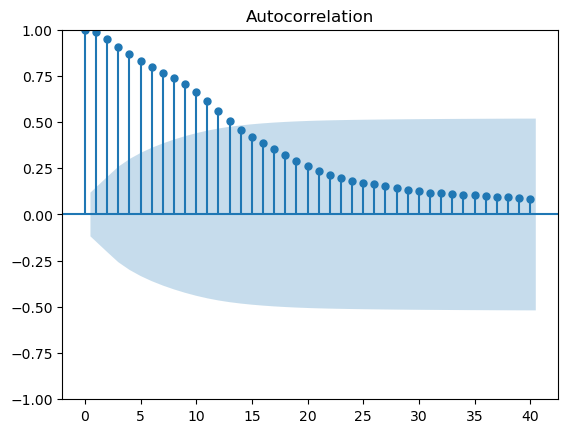

In [12]:
sm.graphics.tsa.plot_acf(df_us_diff['usdiff'][1:], lags=40)
plt.show()

In [13]:
adf_test(df_us_diff['usdiff'][1:])

Results of Dickey-Fuller Test:
Test Statistic                  -3.799151
p-value                          0.002916
#Lags Used                      11.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


With a p-value of .002, we reject the null hypothesis and conclude that the time series is stationary. This seems surprising given the plot of the differenced data.

Text(0.5, 1.0, 'US ZHVI with differencing 2')

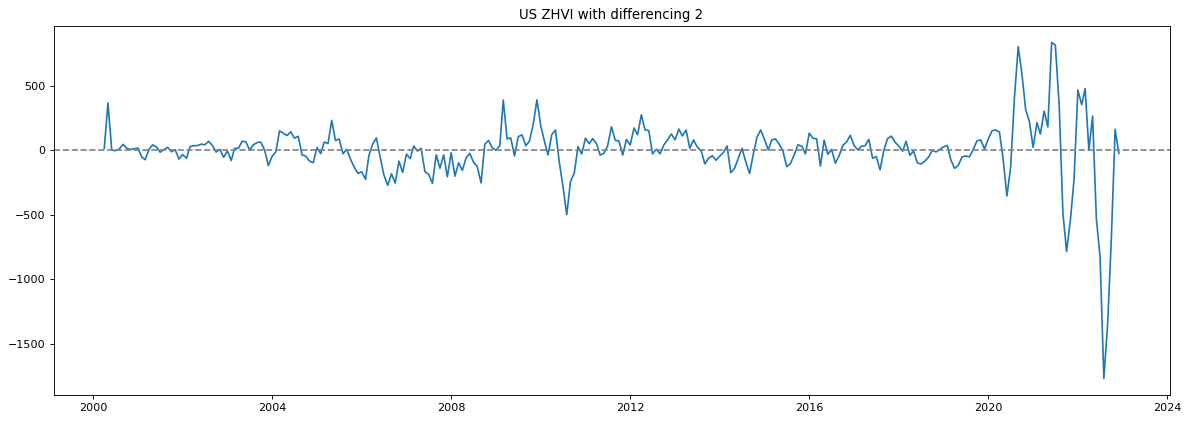

In [14]:
plt.figure(figsize=(18, 6), dpi=80)
df_us_second_diff = pd.DataFrame({'date': df['date'],
                           'usdiff': df['UnitedStates'].diff(1).diff(1)})
plt.plot('date', 'usdiff', data=df_us_second_diff)
plt.axhline(color='gray', linestyle='dashed')
plt.title('US ZHVI with differencing 2')

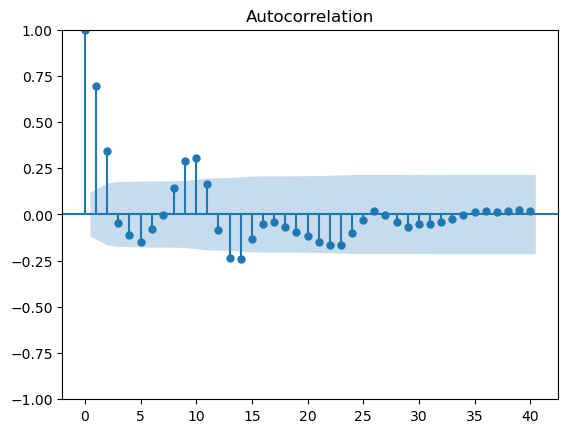

In [15]:
us_second_diff = df['UnitedStates'].diff(1).diff(1)[2:]
sm.graphics.tsa.plot_acf(us_second_diff, lags=40)
plt.show()

In [16]:
adf_test(us_second_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.436331
p-value                          0.009781
#Lags Used                      16.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


With a p-value of .009, we can reject the null hypothesis and conclude that the time series is stationary.

We now turn to examine the relationship between ZHVI and CPI. We start by visualizing the CPI time series.

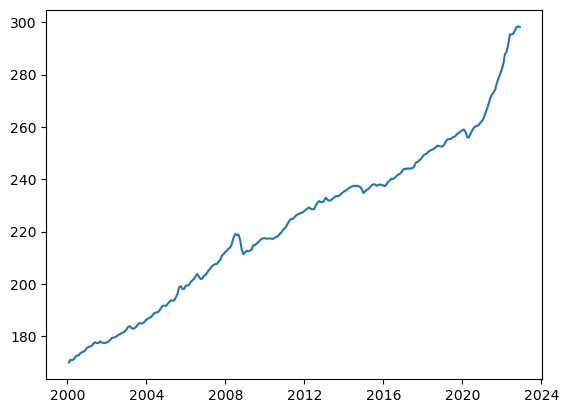

In [17]:
plt.plot(df['date'], df['CPI'])

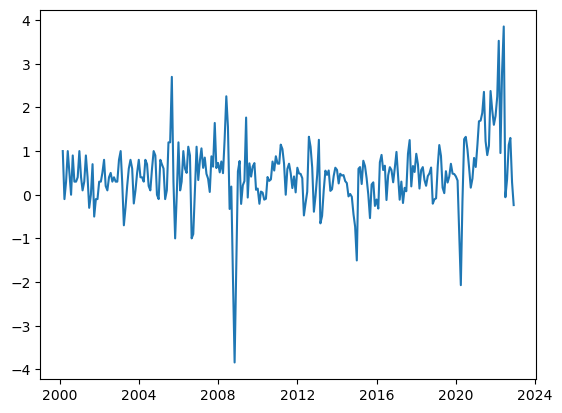

In [18]:
plt.plot(df['date'], df['CPI'].diff(1))

For each level of differenced ZHVI data (0, 1, and 2 levels) we visualize the relationship with CPI and test for Granger causality in both directions.

[]

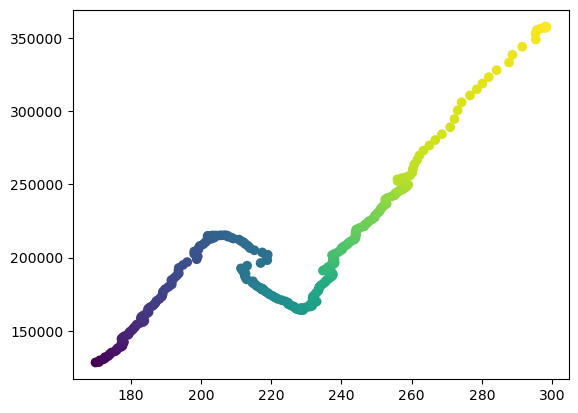

In [19]:
# as expected, housing prices track with the overall CPI
# both simply increase over time, as we can see by the continuous color scale
plt.scatter(df['CPI'], df['UnitedStates'], c=df['date'])
plt.plot()

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['UnitedStates', 'CPI']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.7330  , p=0.0137  , df_denom=256, df_num=6
ssr based chi2 test:   chi2=17.2310 , p=0.0085  , df=6
likelihood ratio test: chi2=16.7016 , p=0.0104  , df=6
parameter F test:         F=2.7330  , p=0.0137  , df_denom=256, df_num=6


{6: ({'ssr_ftest': (2.733041478078837, 0.013659473422688298, 256.0, 6),
   'ssr_chi2test': (17.23097244382517, 0.008470838240203114, 6),
   'lrtest': (16.701591634984652, 0.010444829165446184, 6),
   'params_ftest': (2.7330414780842607, 0.013659473422524228, 256.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

With significant p-values, we conclude that Granger causality is present and therefore previous values of CPI are significant in predicting US ZHVI. We also check the reverse direction to attempt to establish the direction of causality.

In [21]:
grangercausalitytests(df[['CPI', 'UnitedStates']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.8897  , p=0.0010  , df_denom=256, df_num=6
ssr based chi2 test:   chi2=24.5233 , p=0.0004  , df=6
likelihood ratio test: chi2=23.4691 , p=0.0007  , df=6
parameter F test:         F=3.8897  , p=0.0010  , df_denom=256, df_num=6


{6: ({'ssr_ftest': (3.889699249829427, 0.0009792974947483736, 256.0, 6),
   'ssr_chi2test': (24.523338239158967, 0.00041826693020664927, 6),
   'lrtest': (23.469113072533275, 0.0006536636265927823, 6),
   'params_ftest': (3.8896992502535883, 0.0009792974937841703, 256.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

We see that with significant p-values in the opposite direction, we cannot establish the direction of causality.

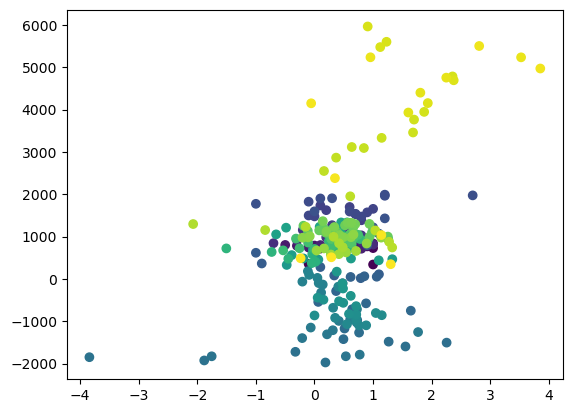

In [22]:
# at the level of the differenced data, there is not a clear pattern
plt.scatter(df['CPI'].diff(1), df_us_diff['usdiff'], c=df['date'])

The Granger causality tests show bidirectional Granger causality, as before.

In [23]:
grangerdf_usdiff = pd.concat([df_us_diff, df['CPI']], axis=1).iloc[1:,:]
grangercausalitytests(grangerdf_usdiff[['usdiff', 'CPI']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.8215  , p=0.0112  , df_denom=255, df_num=6
ssr based chi2 test:   chi2=17.7923 , p=0.0068  , df=6
likelihood ratio test: chi2=17.2266 , p=0.0085  , df=6
parameter F test:         F=2.8215  , p=0.0112  , df_denom=255, df_num=6


{6: ({'ssr_ftest': (2.8215378602303725, 0.011225646452196649, 255.0, 6),
   'ssr_chi2test': (17.792285800982114, 0.006772799817344373, 6),
   'lrtest': (17.226582529774532, 0.008485617868491866, 6),
   'params_ftest': (2.821537860229825, 0.011225646452210455, 255.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [24]:
grangercausalitytests(grangerdf_usdiff[['CPI', 'usdiff']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.6521  , p=0.0017  , df_denom=255, df_num=6
ssr based chi2 test:   chi2=23.0294 , p=0.0008  , df=6
likelihood ratio test: chi2=22.0932 , p=0.0012  , df=6
parameter F test:         F=3.6521  , p=0.0017  , df_denom=255, df_num=6


{6: ({'ssr_ftest': (3.6520512165801104, 0.0016994545718422103, 255.0, 6),
   'ssr_chi2test': (23.029405318669873, 0.0007866895699031656, 6),
   'lrtest': (22.093204643830177, 0.0011646705680887152, 6),
   'params_ftest': (3.6520512165657095, 0.0016994545718986935, 255.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

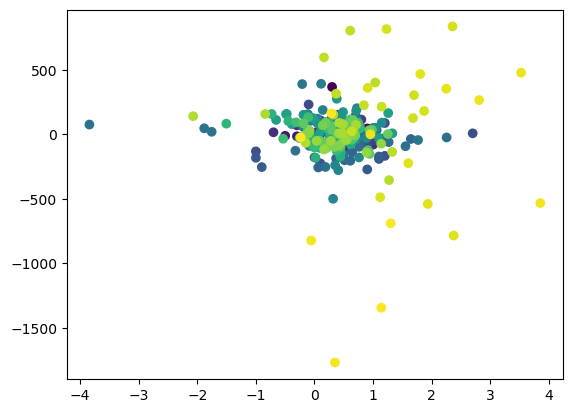

In [25]:
# at the level of second differences, there is still no clear pattern
plt.scatter(df['CPI'].diff(1)[2:], us_second_diff, c=df['date'][2:])

At the second level of differencing, an asymmetry is observed in the Granger causality. Previous levels of CPI are significant in predicting the second-order difference of US ZHVI values, but the reverse effect is not significant.

In [26]:
grangerdf_usseconddiff = pd.concat([df_us_second_diff, df['CPI']], axis=1).iloc[2:,:]
grangercausalitytests(grangerdf_usseconddiff[['usdiff', 'CPI']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.2852  , p=0.0039  , df_denom=254, df_num=6
ssr based chi2 test:   chi2=20.7198 , p=0.0021  , df=6
likelihood ratio test: chi2=19.9552 , p=0.0028  , df=6
parameter F test:         F=3.2852  , p=0.0039  , df_denom=254, df_num=6


{6: ({'ssr_ftest': (3.2851603883742353, 0.003946881584089637, 254.0, 6),
   'ssr_chi2test': (20.719791110927265, 0.002059802722206256, 6),
   'lrtest': (19.955152955798894, 0.002820756242387177, 6),
   'params_ftest': (3.2851603883725335, 0.00394688158410496, 254.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [27]:
grangercausalitytests(grangerdf_usseconddiff[['CPI', 'usdiff']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.6994  , p=0.1215  , df_denom=254, df_num=6
ssr based chi2 test:   chi2=10.7182 , p=0.0975  , df=6
likelihood ratio test: chi2=10.5087 , p=0.1048  , df=6
parameter F test:         F=1.6994  , p=0.1215  , df_denom=254, df_num=6


{6: ({'ssr_ftest': (1.699394871170227, 0.12151729122640585, 254.0, 6),
   'ssr_chi2test': (10.718230644152376, 0.09748509562192062, 6),
   'lrtest': (10.508688116368091, 0.10480062419830624, 6),
   'params_ftest': (1.6993948711681972, 0.12151729122689217, 254.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

We now carry out a similar analysis with the mortgage rate data. We find that we cannot determine the direction of Granger causality at any level of differencing.

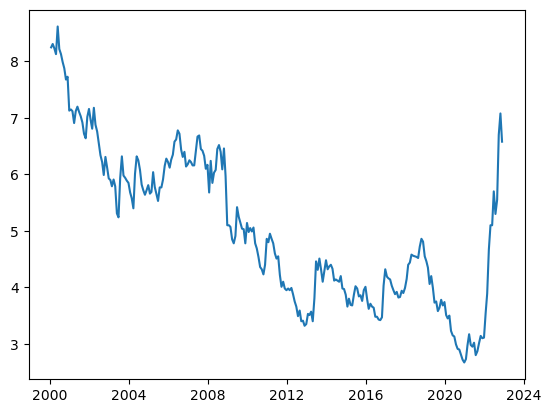

In [28]:
plt.plot(df['date'], df['MORTGAGE30US'])

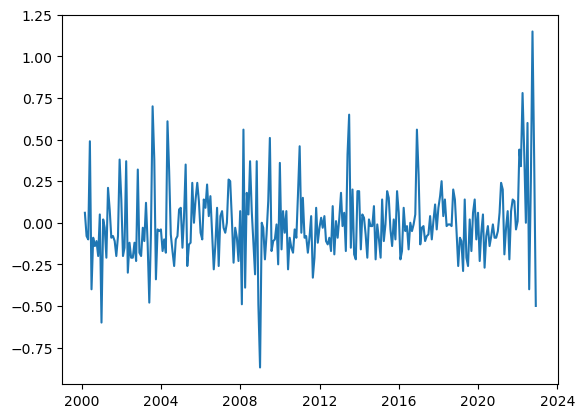

In [29]:
plt.plot(df['date'], df['MORTGAGE30US'].diff(1))

[]

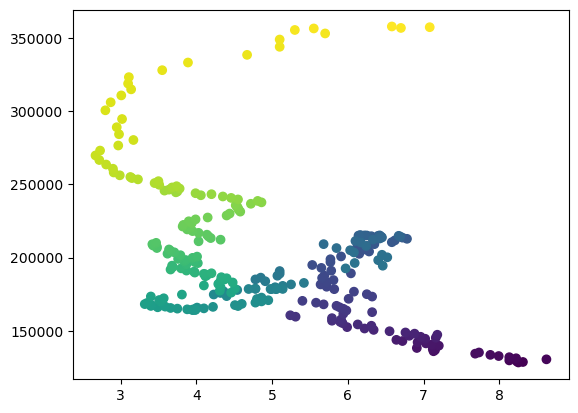

In [30]:
plt.scatter(df['MORTGAGE30US'], df['UnitedStates'], c=df['date'])
plt.plot()

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['UnitedStates', 'MORTGAGE30US']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.8077  , p=0.0012  , df_denom=256, df_num=6
ssr based chi2 test:   chi2=24.0063 , p=0.0005  , df=6
likelihood ratio test: chi2=22.9949 , p=0.0008  , df=6
parameter F test:         F=3.8077  , p=0.0012  , df_denom=256, df_num=6


{6: ({'ssr_ftest': (3.8076969109874597, 0.0011844243745473637, 256.0, 6),
   'ssr_chi2test': (24.006339118491248, 0.0005208577401532292, 6),
   'lrtest': (22.99489052303079, 0.0007981917140329698, 6),
   'params_ftest': (3.807696910999749, 0.0011844243745136329, 256.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [32]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['MORTGAGE30US', 'UnitedStates']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.9687  , p=0.0081  , df_denom=256, df_num=6
ssr based chi2 test:   chi2=18.7170 , p=0.0047  , df=6
likelihood ratio test: chi2=18.0946 , p=0.0060  , df=6
parameter F test:         F=2.9687  , p=0.0081  , df_denom=256, df_num=6


{6: ({'ssr_ftest': (2.9687463298695835, 0.00806810232943686, 256.0, 6),
   'ssr_chi2test': (18.717017876599638, 0.004669221609697474, 6),
   'lrtest': (18.094564940686837, 0.00600016746577985, 6),
   'params_ftest': (2.9687463302035524, 0.008068102323378349, 256.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

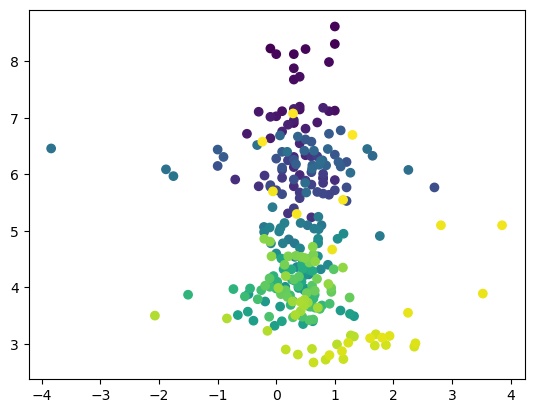

In [33]:
plt.scatter(df['CPI'].diff(1), df['MORTGAGE30US'], c=df['date'])

In [34]:
grangerdf_usdiff = pd.concat([df_us_diff, df['MORTGAGE30US']], axis=1).iloc[1:,:]
grangercausalitytests(grangerdf_usdiff[['usdiff', 'MORTGAGE30US']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.7987  , p=0.0001  , df_denom=255, df_num=6
ssr based chi2 test:   chi2=30.2600 , p=0.0000  , df=6
likelihood ratio test: chi2=28.6703 , p=0.0001  , df=6
parameter F test:         F=4.7987  , p=0.0001  , df_denom=255, df_num=6


{6: ({'ssr_ftest': (4.798700448370028, 0.00011713128637310947, 255.0, 6),
   'ssr_chi2test': (30.260040474427477, 3.50769281036378e-05, 6),
   'lrtest': (28.67030353286009, 7.022822413819957e-05, 6),
   'params_ftest': (4.798700448370231, 0.00011713128637305479, 255.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [35]:
grangercausalitytests(grangerdf_usdiff[['MORTGAGE30US', 'usdiff']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.7456  , p=0.0001  , df_denom=255, df_num=6
ssr based chi2 test:   chi2=29.9253 , p=0.0000  , df=6
likelihood ratio test: chi2=28.3693 , p=0.0001  , df=6
parameter F test:         F=4.7456  , p=0.0001  , df_denom=255, df_num=6


{6: ({'ssr_ftest': (4.745614983796738, 0.000132687963255066, 255.0, 6),
   'ssr_chi2test': (29.92528978017708, 4.06150203140325e-05, 6),
   'lrtest': (28.36934612604648, 8.004516753981397e-05, 6),
   'params_ftest': (4.745614983799935, 0.00013268796325407222, 255.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

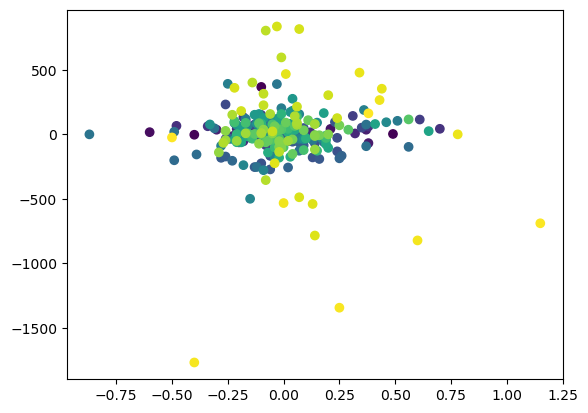

In [36]:
plt.scatter(df['MORTGAGE30US'].diff(1)[2:], us_second_diff, c=df['date'][2:])

In [37]:
grangerdf_usseconddiff = pd.concat([df_us_second_diff, df['MORTGAGE30US']], axis=1).iloc[2:,:]
grangercausalitytests(grangerdf_usseconddiff[['usdiff', 'MORTGAGE30US']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=5.9476  , p=0.0000  , df_denom=254, df_num=6
ssr based chi2 test:   chi2=37.5118 , p=0.0000  , df=6
likelihood ratio test: chi2=35.1001 , p=0.0000  , df=6
parameter F test:         F=5.9476  , p=0.0000  , df_denom=254, df_num=6


{6: ({'ssr_ftest': (5.947560037509167, 7.85772841304305e-06, 254.0, 6),
   'ssr_chi2test': (37.51177629956569, 1.3992512565243565e-06, 6),
   'lrtest': (35.10011429286851, 4.121239010283492e-06, 6),
   'params_ftest': (5.9475600375091915, 7.857728413042478e-06, 254.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [38]:
grangercausalitytests(grangerdf_usseconddiff[['MORTGAGE30US', 'usdiff']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.3510  , p=0.0315  , df_denom=254, df_num=6
ssr based chi2 test:   chi2=14.8279 , p=0.0216  , df=6
likelihood ratio test: chi2=14.4308 , p=0.0252  , df=6
parameter F test:         F=2.3510  , p=0.0315  , df_denom=254, df_num=6


{6: ({'ssr_ftest': (2.350997453376214, 0.03152814405484667, 254.0, 6),
   'ssr_chi2test': (14.827944568144467, 0.02163797059875702, 6),
   'lrtest': (14.430842884388426, 0.02517673588100362, 6),
   'params_ftest': (2.3509974533741316, 0.031528144054987994, 254.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}